2. Feature Engineering I (10%)

In [77]:
import pandas as pd
import numpy as np
import math
import requests
import json
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv(r'C:\Users\chait\OneDrive\Documents\School\IFT_6758\2.Project\Milestone2_Draft\data\tidy_df.csv')

In [79]:
# Angle of the shot added to the dataframe
df['angle_from_net'] = np.arcsin(df['y_coordinates'].abs()/df['distance_from_net'])*180/math.pi

In [80]:
# Imputing empty net data in existing dataframe

df['empty_net'] = df['empty_net'].replace(np.nan,0)
df['empty_net'] = df['empty_net'].replace(True,1)
df['empty_net'] = df['empty_net'].replace(False,0)

In [81]:
df = df[~df['distance_from_net'].isnull()] # distance was null for 17 rows
df = df[~df['angle_from_net'].isnull()] # angle was null for 18 rows

In [84]:
# training (train+validation sets for model) and test tests creation

df_train = df[df['season'] != 20192020]
df_test = df[df['season'] == 20192020]

In [83]:
df_train_nogoals = df_train[df_train['shot_ind']==1]
df_train_goals = df_train[df_train['goal_ind']==1]

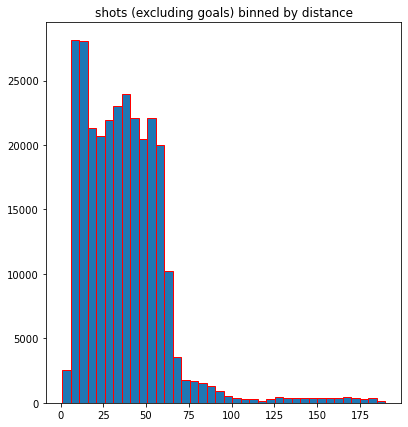

In [87]:
fig = plt.figure(figsize=(14,7))
plt.subplot(121)
plt.hist(df_train_nogoals['distance_from_net'], edgecolor="red", bins=math.ceil((df_train_nogoals['distance_from_net'].max() - df_train_nogoals['distance_from_net'].min())/5))
plt.title("shots (excluding goals) binned by distance")
plt.show()


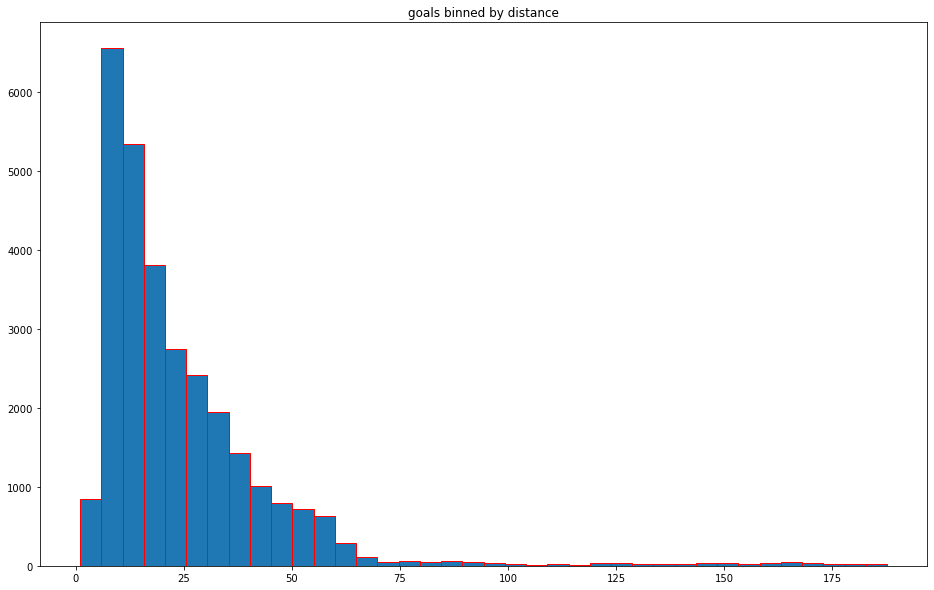

In [86]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_goals['distance_from_net'], edgecolor="red", bins=math.ceil((df_train_goals['distance_from_net'].max() - df_train_goals['distance_from_net'].min())/5))
plt.title("goals binned by distance")
plt.show()

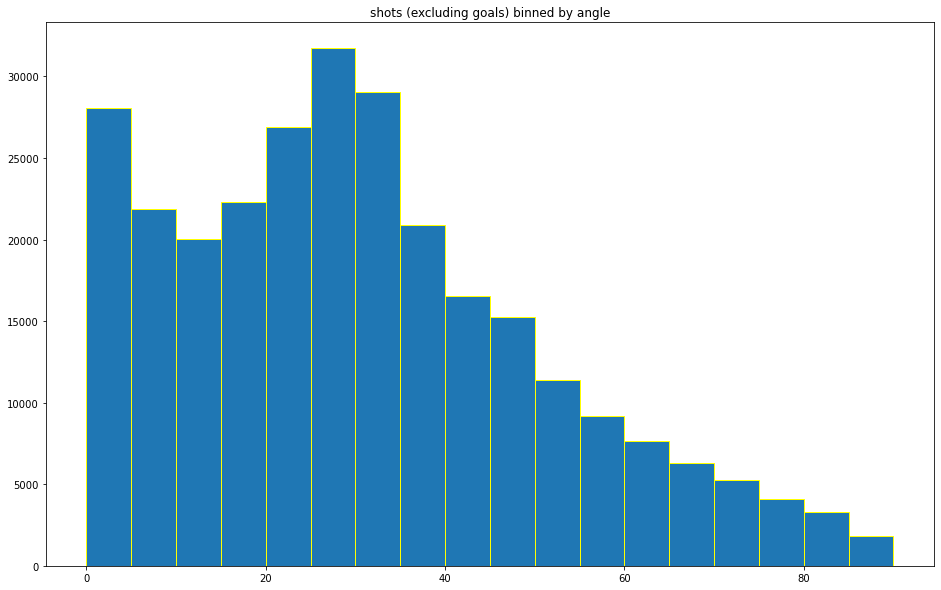

In [88]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_nogoals['angle_from_net'], edgecolor="yellow", bins=math.ceil((df_train_nogoals['angle_from_net'].max() - df_train_nogoals['angle_from_net'].min())/5))
plt.title("shots (excluding goals) binned by angle")
plt.show()


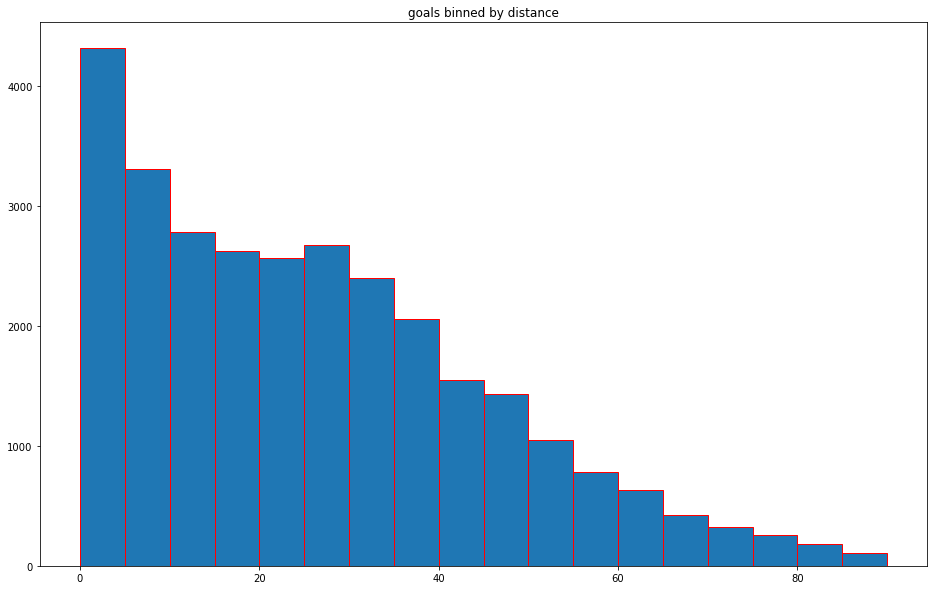

In [89]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_goals['angle_from_net'],edgecolor="red", bins=math.ceil((df_train_goals['angle_from_net'].max() - df_train_goals['angle_from_net'].min())/5))
plt.title("goals binned by distance")
plt.show()


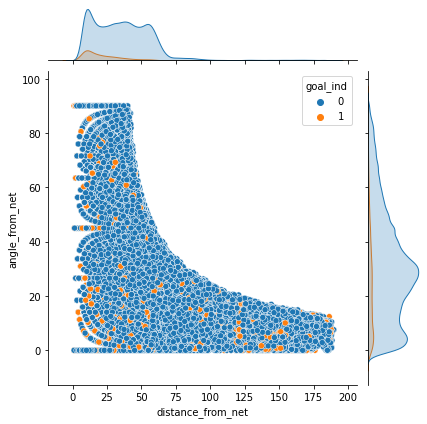

In [90]:
# Joint plot showing the relation between distance of the shot and angle of the shot
sns.jointplot(data=df_train, x="distance_from_net", y="angle_from_net", hue="goal_ind")


<ipython-input-91-d53752cc87d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['distance_from_net_bucket'] = pd.qcut(df_train['distance_from_net'], n_buckets, labels = False) +1
<ipython-input-91-d53752cc87d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['angle_from_net_bucket'] = pd.qcut(df_train['angle_from_net'], n_buckets, labels = False) +1
<ipython-input-91-d53752cc87d7>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI b

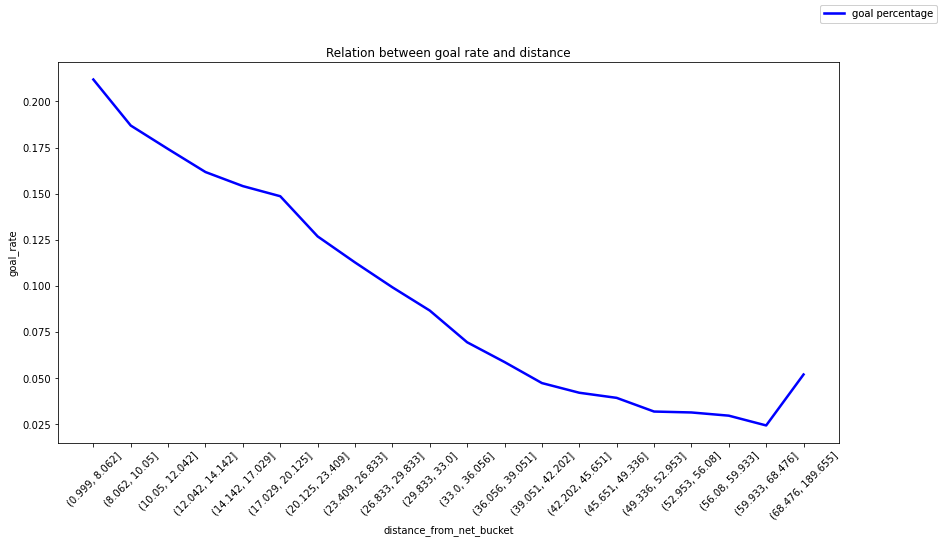

In [91]:
# Relation between goal rate and distance


n_buckets = 20

df_train['distance_from_net_bucket'] = pd.qcut(df_train['distance_from_net'], n_buckets, labels = False) +1
df_train['angle_from_net_bucket'] = pd.qcut(df_train['angle_from_net'], n_buckets, labels = False) +1

intervals = list(set(pd.qcut(df_train['distance_from_net'], n_buckets)))
intervals.sort()
intervals = [str(interval) for interval in intervals]


intervals_ang = list(set(pd.qcut(df_train['angle_from_net'], n_buckets)))
intervals_ang.sort()
intervals_ang = [str(interval_ang) for interval_ang in intervals_ang]

df_train_copy = df_train.copy()
df_train_copy['shot_count'] = 1

df_train_copy1 = df_train_copy[['goal_ind','shot_count','distance_from_net_bucket']].groupby(['distance_from_net_bucket']).sum().reset_index()
df_train_copy1['goal_rate'] = df_train_copy1['goal_ind']/df_train_copy1['shot_count']

y1_max = max(df_train_copy1['goal_rate'])

fig = plt.figure(figsize = (14,7))
ax = sns.lineplot(x = 'distance_from_net_bucket', y = 'goal_rate', label='goal percentage', data = df_train_copy1, color='b', legend = False, linewidth = 2.5)
ax.set_xticks(range(1,n_buckets+1))
ax.set_xticklabels(intervals, rotation = 45)
ax.set_ylim(bottom=0, top=y1_max * 1.1)
fig.legend(loc="upper right")
plt.title(f"Relation between goal rate and distance")
fig.legend(loc="upper right")
plt.autoscale()
fig.show()
#fig.savefig("../../ift6758-blog-template-main/figures/question_5_2_"+str(i)+".png", bbox_inches = 'tight')


In [64]:
df_train_copy1

,distance_from_net_bucket,goal_ind,shot_count,goal_rate
0,1,3305,15598,0.211886
1,2,3085,16503,0.186936
2,3,2714,15580,0.174198
3,4,2357,14574,0.161726
4,5,2462,15976,0.154106
5,6,2271,15281,0.148616
6,7,1983,15634,0.126839
7,8,1740,15435,0.112731
8,9,1553,15646,0.099259
9,10,1336,15420,0.086641


<ipython-input-92-84c5a50b1062>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


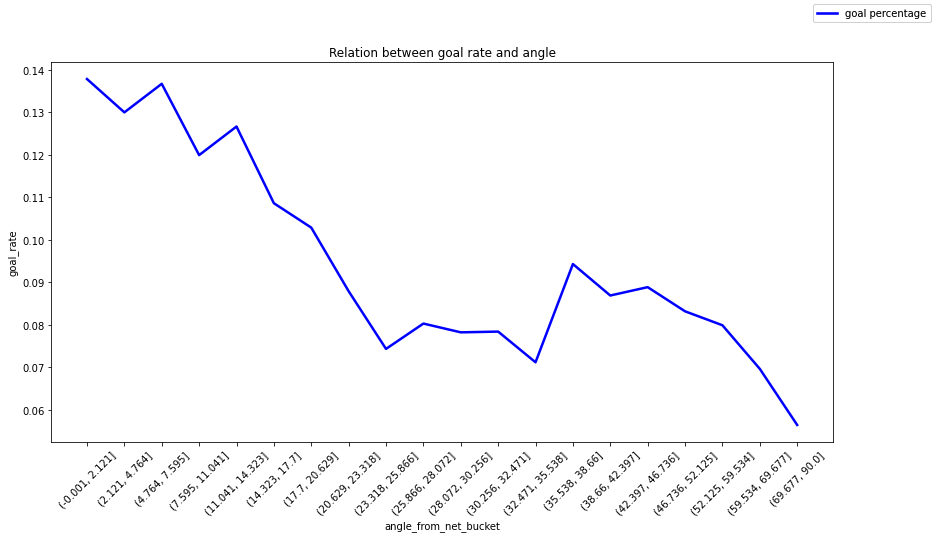

In [92]:
# Relation between goal rate and angle

df_train_copy2 = df_train_copy[['goal_ind','shot_count','angle_from_net_bucket']].groupby(['angle_from_net_bucket']).sum().reset_index()
df_train_copy2['goal_rate'] = df_train_copy2['goal_ind']/df_train_copy2['shot_count']

y2_max = max(df_train_copy2['goal_rate'])

fig = plt.figure(figsize = (14,7))
ax = sns.lineplot(x = 'angle_from_net_bucket', y = 'goal_rate', label='goal percentage', data = df_train_copy2, color='b', legend = False, linewidth = 2.5)
ax.set_xticks(range(1,n_buckets+1))
ax.set_xticklabels(intervals_ang, rotation = 45)
ax.set_ylim(bottom=0, top=y2_max * 1.1)
fig.legend(loc="upper right")
plt.title(f"Relation between goal rate and angle")
fig.legend(loc="upper right")
plt.autoscale()
fig.show()

In [93]:
#goals only to be binned by distance for empty net and non-empty net events

df_train_empty_net = df_train[(df_train['empty_net']==1) & (df_train['goal_ind']==1)]
df_train_non_empty_net = df_train[(df_train['empty_net']==0) & (df_train['goal_ind']==1)]
df_train_empty_net.shape

(1418, 26)

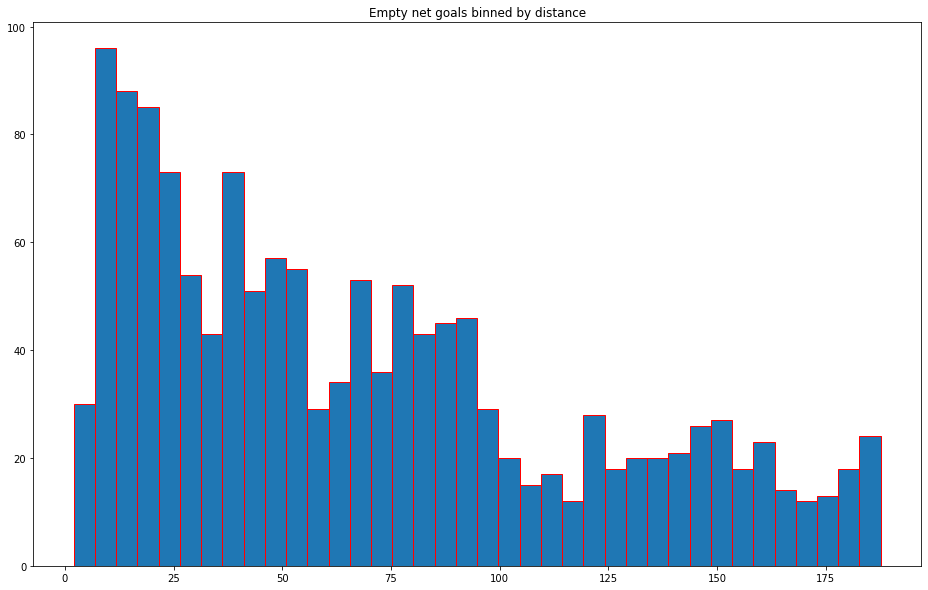

In [94]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_empty_net['distance_from_net'], edgecolor="red", bins=math.ceil((df_train_empty_net['distance_from_net'].max() - df_train_empty_net['distance_from_net'].min())/5))
plt.title("Empty net goals binned by distance")
plt.show()

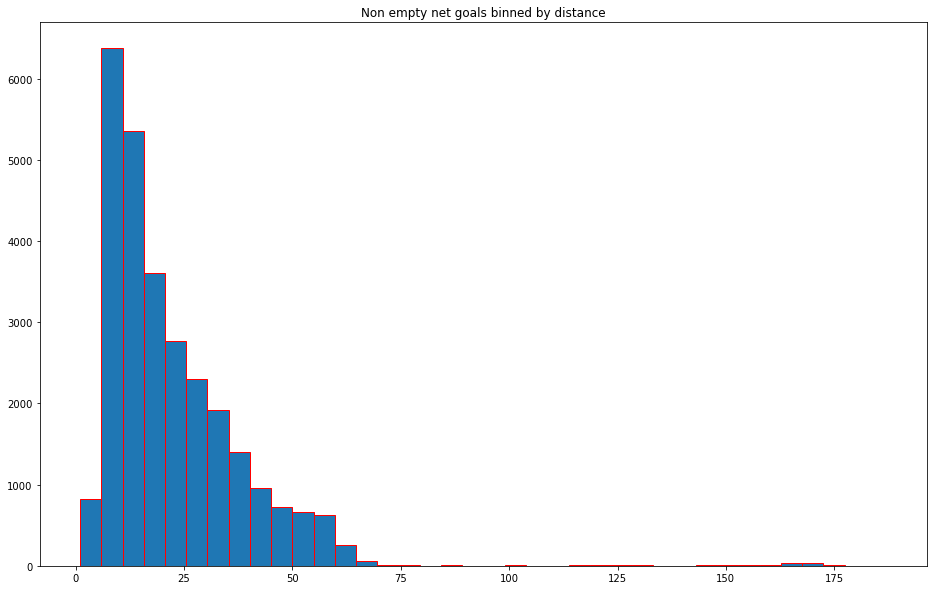

In [95]:
fig = plt.figure(figsize=(35,10))
plt.subplot(121)
plt.hist(df_train_non_empty_net['distance_from_net'], edgecolor="red", bins=math.ceil((df_train_non_empty_net['distance_from_net'].max() - df_train_non_empty_net['distance_from_net'].min())/5))
plt.title("Non empty net goals binned by distance")
plt.show()

In [97]:
# events that have incorrect features (e.g. wrong x/y coordinates) validated by the NHL gamecenter video clips


df_goals = df[df['goal_ind']==1]
df_goals_anomaly = df_goals[(df_goals['x_coordinates'].abs()>89)&(df_goals['distance_from_net']>=150)&(df_goals['empty_net']==0)]
df_goals_anomaly

,Unnamed: 0,game_id,season,season_type,event_id,home_team,away_team,home_team_side_1st_period,attacking_team,attacking_player,...,shot_ind,x_coordinates,y_coordinates,shot_type,empty_net,strength,gwg,distance_from_net,attacking_team_side,angle_from_net
30946,30946,2016020510,20162017,R,167,Florida Panthers,Detroit Red Wings,right,Florida Panthers,Derek MacKenzie,...,0,-97.0,21.0,Slap Shot,0,Even,False,187.181730,left,6.441600
325403,71928,2019030145,20192020,P,212,Boston Bruins,Carolina Hurricanes,left,Boston Bruins,Patrice Bergeron,...,0,98.0,14.0,Wrist Shot,0,Power Play,True,187.523332,right,4.281536
325604,72129,2019030154,20192020,P,101,Chicago Blackhawks,Vegas Golden Knights,right,Chicago Blackhawks,Matthew Highmore,...,0,97.0,21.0,Snap Shot,0,Even,True,187.181730,right,6.441600
326360,72885,2019030176,20192020,P,32,Calgary Flames,Dallas Stars,right,Calgary Flames,Johnny Gaudreau,...,0,94.0,24.0,Wrist Shot,0,Power Play,False,184.567061,right,7.471559
326705,73230,2019030185,20192020,P,115,St. Louis Blues,Vancouver Canucks,left,St. Louis Blues,Ryan O'Reilly,...,0,-91.0,-7.0,Backhand,0,Even,False,180.136060,left,2.227047


In [110]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<AxesSubplot:xlabel='goal_ind', ylabel='count'>

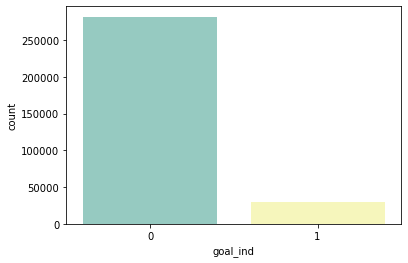

In [104]:
# Class 0 (no-goal) vs. Class 1 (goal) of the whole training set
sns.countplot(x='goal_ind', data = df_train, palette = 'Set3')

<AxesSubplot:xlabel='goal_ind', ylabel='count'>

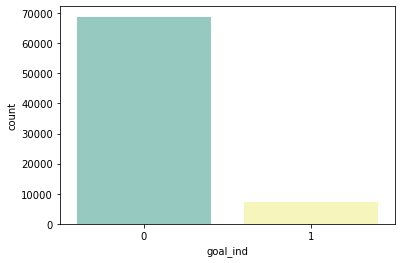

In [105]:
# Class 0 (no-goal) vs. Class 1 (goal) of the final test set

sns.countplot(x='goal_ind', data = df_test, palette = 'Set3')

<AxesSubplot:xlabel='shot_type', ylabel='count'>

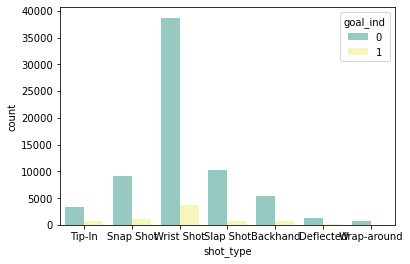

In [106]:
sns.countplot(x='shot_type', data = df_test, palette = 'Set3', hue = 'goal_ind')

In [114]:
X = df_train['distance_from_net'].values.reshape(-1,1)
y = df_train['goal_ind']
#y = y.astype(int)
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=10)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("accuracy score of the train set data is:",clf.score(X_train, y_train))

print("accuracy score of the validation set data is:",clf.score(X_valid, y_valid))

y_pred = clf.predict(X_valid)

cnt = 0
for i in range(len(X_valid)):
    if y_pred[i] == 1:
        cnt += 1
    
print('Number of goal events predicted by classifier is :', cnt)


accuracy score of the train set data is: 0.9054693023127702
accuracy score of the validation set data is: 0.9052464705756336
Number of goal events predicted by classifier is : 0


In [115]:
# Confusion Matrix

cm = sklearn.metrics.confusion_matrix(y_valid, y_pred, labels=None, sample_weight=None, normalize=None)
#print(cm)
# true negatives is C00 , false negatives is C10, true positives is C11 and false positives is C01.
print("TN = ", cm[0][0])
print("FN = ", cm[1][0])
print("TP = ", cm[1][1])
print("FP = ", cm[0][1])
print("TPR = ",cm[1][1]/(cm[1][1]+cm[1][0]))
print("FPR = ",cm[0][1]/(cm[0][1]+cm[0][0]))

TN =  84512
FN =  8846
TP =  0
FP =  0
TPR =  0.0
FPR =  0.0


In [116]:
# Predictted probabilities of Class 0 (no goal) & Class 1 (goal)

predicted_prob = clf.predict_proba(X_valid)
predicted_prob

array([[0.94670817, 0.05329183],
       [0.9595025 , 0.0404975 ],
       [0.88516261, 0.11483739],
       ...,
       [0.82458021, 0.17541979],
       [0.84989907, 0.15010093],
       [0.8374502 , 0.1625498 ]])

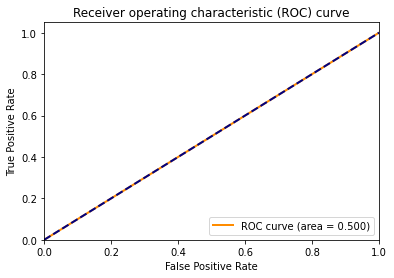

In [117]:
# ROC curve

y_score = clf.fit(X_train, y_train).decision_function(X_valid)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_valid, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC) curve")
plt.legend(loc="lower right")
plt.show()

In [119]:
# a new df with goal_inx and probabilities of classes

dummy_goal = []
for i in y_valid:
    dummy_goal.append(i)
df_goals = pd.DataFrame(dummy_goal, columns = ["goal_ind"])

dummy_list = []
for i in predicted_prob:
    dummy_list.append(i)
df_prob = pd.DataFrame(dummy_list, columns = ["No_Goal_Prob","Goal_Prob"])
df_new = pd.concat([df_goals, df_prob], axis=1)
df_new['shot_count'] = 1
df_new
#df_new['Goal_Prob'].quantile(np.linspace(0,1,21))

,goal_ind,No_Goal_Prob,Goal_Prob,shot_count
0,0,0.946708,0.053292,1
1,0,0.959502,0.040498,1
2,0,0.885163,0.114837,1
3,0,0.881074,0.118926,1
4,0,0.959602,0.040398,1
...,...,...,...,...
93353,0,0.821573,0.178427,1
93354,0,0.871420,0.128580,1
93355,0,0.824580,0.175420,1
93356,0,0.849899,0.150101,1


In [121]:
# The goal rate (#goals / (#no_goals + #goals)) as a function of the shot probability model percentile

n_buckets = 20
dummy = 0
j=0
temp_list = []

df_new['Goal_Prob_bucket'] = pd.qcut(df_new['Goal_Prob'], n_buckets, labels = False) + 0
# print(df_new.sample(10))
df_new1 = df_new.copy()
df_new1 = df_new1[['goal_ind','shot_count','Goal_Prob_bucket']].groupby(['Goal_Prob_bucket']).sum().reset_index()
df_new1['goal_rate'] = df_new1['goal_ind']/df_new1['shot_count']
df_new1['pctile'] = df_new1['Goal_Prob_bucket']*(100/n_buckets)
df_new1['pctile_cum'] = 100-(df_new1['Goal_Prob_bucket']+1)*(100/n_buckets)
for i in df_new1['goal_ind']:
    dummy = i + dummy
    temp = dummy / df_new1['goal_ind'].sum()
    temp_list.append(temp)
    j+=1
df_new1['Proportion'] = temp_list
print(df_new1.drop(['Goal_Prob_bucket'],axis=1))

    goal_ind  shot_count  goal_rate  pctile  pctile_cum  Proportion
0        241        4669   0.051617     0.0        95.0    0.027244
1        107        4676   0.022883     5.0        90.0    0.039340
2        136        4790   0.028392    10.0        85.0    0.054714
3        144        4571   0.031503    15.0        80.0    0.070993
4        154        4701   0.032759    20.0        75.0    0.088402
5        171        4618   0.037029    25.0        70.0    0.107732
6        209        4652   0.044927    30.0        65.0    0.131359
7        231        4688   0.049275    35.0        60.0    0.157472
8        291        4754   0.061212    40.0        55.0    0.190369
9        319        4594   0.069438    45.0        50.0    0.226430
10       414        4762   0.086938    50.0        45.0    0.273231
11       466        4554   0.102328    55.0        40.0    0.325910
12       543        4732   0.114751    60.0        35.0    0.387294
13       581        4634   0.125378    65.0     

<ipython-input-122-0d545c152230>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


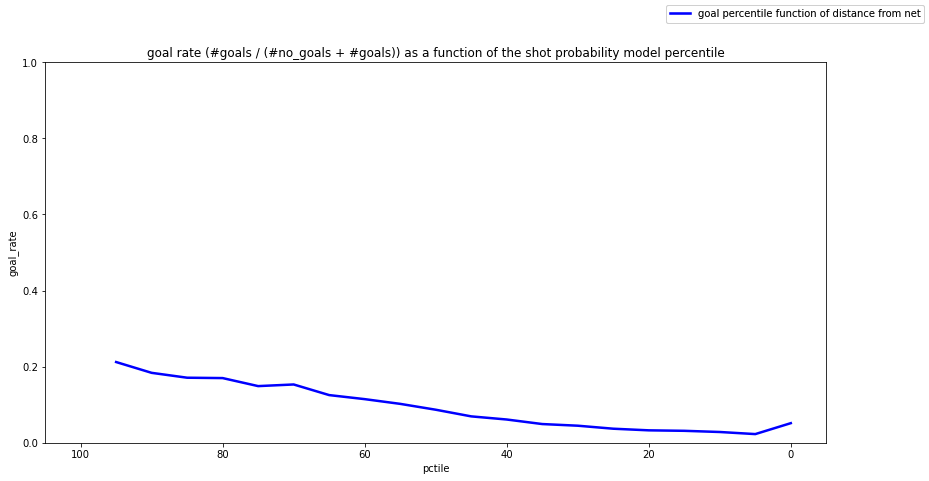

In [122]:
y1_max = max(df_new1['goal_rate'])

fig = plt.figure(figsize = (14,7))
ax = sns.lineplot(x = 'pctile', y = 'goal_rate', label='goal percentile function of distance from net', data = df_new1, color='b', legend = False, linewidth = 2.5)
ax.set_xlim(left=105, right=-5)
ax.set_ylim(bottom=0, top=1)
fig.legend(loc="upper right")
plt.title(f"goal rate (#goals / (#no_goals + #goals)) as a function of the shot probability model percentile")
fig.legend(loc="upper right")
#plt.autoscale()
fig.show()

<ipython-input-123-7bea2391f458>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


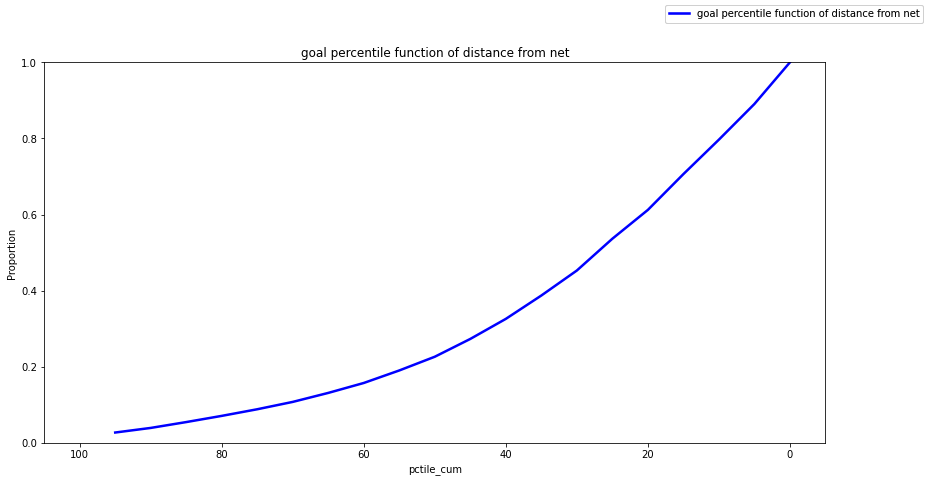

In [123]:
y1_max = max(df_new1['Proportion'])

fig = plt.figure(figsize = (14,7))
ax = sns.lineplot(x = 'pctile_cum', y = 'Proportion', label='goal percentile function of distance from net', data = df_new1, color='b', legend = False, linewidth = 2.5)
ax.set_xlim(left=105, right=-5)
ax.set_ylim(bottom=0, top=1)
fig.legend(loc="upper right")
plt.title(f"goal percentile function of distance from net")
fig.legend(loc="upper right")
#plt.autoscale()
fig.show()